<a href="https://colab.research.google.com/github/AurelienGgt/Customer-Personality-Analysis/blob/main/Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import of data + library + Dependance (if needed)

## Access to google drive

In [147]:
# Mount access to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import library

In [148]:
# Library
import pandas as pd

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Access of the data

In [149]:
df = pd.read_csv('/content/drive/My Drive/Customer Personality Analysis/marketing_campaign.csv',sep='\t') # We have a separator here

## Visualisation of the dataframe

### Visualisation of the missing value

In [150]:
print(f"The number of missing value are : {df.isna().sum().count()} ")

The number of missing value are : 29 


### Modify the date

# Visualisation of categorical column

In [151]:
df # Visualisation of the dataframe

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Before we start our analyse I will rename some colums like the products.

In [152]:
# Rename columns
df = df.rename(columns={
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold'
})

First let's check some categorical columns

Because we will check multiple column, it's better to create a function instead of writing the same code all the time.

This function will help us to visualise the categorical column we want to focus

In [153]:
def categorical_visualisation(col) :

  """
  This function will help us to visualise the categorical column we want to focus
  We put the visualisation as countplot but a pie was also possible.

  Args:
      col: The name of the column to visualize.
  """

# On this part we are watching directly the value
  print(f"Visualisation of the Value for {col}: ")
  print("")
  column = df[col].value_counts()
  print(column)

# We are using print('') to make some space
  print('')
  print('')

# On this part we are watching directly the visualisation
  print(f"Graphic of the visualisation for {col}: ")
  print("")
  sorted_cat= df[col].value_counts().index
  ax = sns.countplot(x=col, data=df, hue=col, palette="magma", dodge=False, legend=False,order=sorted_cat) # color preference here

  # We add the count of the top of the column :
  for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')


  # Add axis labels
  plt.xticks(rotation=45) # Rotation of the label for a better visualisation
  plt.xlabel(col) # Label for x
  plt.title(f"Visualisation of the column : {col}")
  plt.ylabel("Amount of people") # Label for y
  plt.grid(True) # Preference to see the grid
  plt.show()

In [154]:
def Visualisation_groupby(df) :

  """
  This function will help us to visualise the special group of individus.
  The subplot is more usefulll in this case

  Args:
      df: The df has to be a groupby.
  """

  # Instead of one plot I decided to use subplot for a better view

  fig = make_subplots(rows=2, cols=3, subplot_titles=("Fish", "Wines", "Fruits", "Meat", "Sweets", "Gold"))

  # Add traces for each product category
  products = ['Fish', 'Wines', 'Fruits', 'Meat', 'Sweets', 'Gold']
  row_col = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3)]


  for i, product in enumerate(products):
      trace = go.Bar(x=df.index, y=df[product], text=df[product], textposition='auto')
      fig.add_trace(trace, row=row_col[i][0], col=row_col[i][1])


  fig.update_layout(height=800, width=1000, title_text=f"Product Purchases by {df}", showlegend=False)
  fig.show()

## Column : Education

In [155]:
# We will calculate the amount of people without university degree :

no_univ_user =  (df[df['Education'] == '2n Cycle'].value_counts() + df[df['Education'] == 'Basic'].value_counts())
print(f"The percentage of people without university degree is : {round(((len(no_univ_user) / len(df))*100),2)} %")

The percentage of people without university degree is : 11.34 %


As we can see, most of people are graduate with a diploma, a lot of them are not specified maybe Bachelor, Master or Phd but not specified

In [156]:
# Easier for the visualisation
education_df = df.groupby(['Education']).sum()
education_df = education_df[['Fish','Wines','Fruits','Meat','Sweets','Gold']]
education_df

,Fish,Wines,Fruits,Meat,Sweets,Gold
Education,,,,,,
2n Cycle,9639,40231,5878,28675,6953,9419
Basic,921,391,600,618,654,1233
Graduation,48630,320371,34683,202284,35351,57307
Master,11877,123238,8012,60450,7835,14947
PhD,12990,196585,9744,81941,9828,15703


In [157]:
Visualisation_groupby(education_df )

## Column : Marital status

Visualisation of the Value for Marital_Status: 

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Graphic of the visualisation for Marital_Status: 



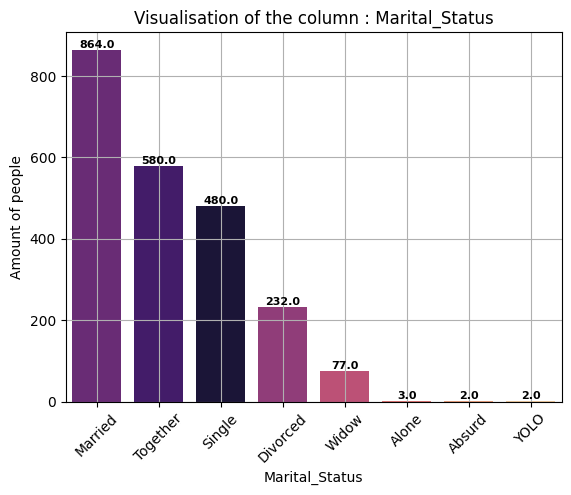

In [158]:
categorical_visualisation("Marital_Status")

In [159]:
# We will calculate the amount of people in relationship in our analyse :

relationship_user =  (df[df['Marital_Status'] == 'Married'].value_counts() + df[df['Marital_Status'] == 'Together'].value_counts())
print(f"The percentage of people in relationship is : {round(((len(relationship_user) / len(df))*100),2)} %")

The percentage of people in relationship is : 63.84 %


Let's check too the type of product they mainly want to buy by Marital_Status

In [160]:
# Easier for the visualisation
marital_df = df.groupby(['Marital_Status']).sum()
marital_df = marital_df[['Fish','Wines','Fruits','Meat','Sweets','Gold']]
marital_df

,Fish,Wines,Fruits,Meat,Sweets,Gold
Marital_Status,,,,,,
Absurd,411,711,169,625,61,408
Alone,23,554,12,79,21,81
Divorced,8130,75364,6363,34848,6222,10739
Married,30569,258751,22235,138829,23070,36999
Single,18344,138399,12881,87412,13086,20990
Together,22615,177959,14703,97500,15151,24937
Widow,3957,28434,2548,14575,3004,4371
YOLO,8,644,6,100,6,84


In [161]:
Visualisation_groupby(marital_df)

## Column : Complain

As we can see most of our customer are in relationship

Visualisation of the Value for Complain: 

Complain
0    2219
1      21
Name: count, dtype: int64


Graphic of the visualisation for Complain: 



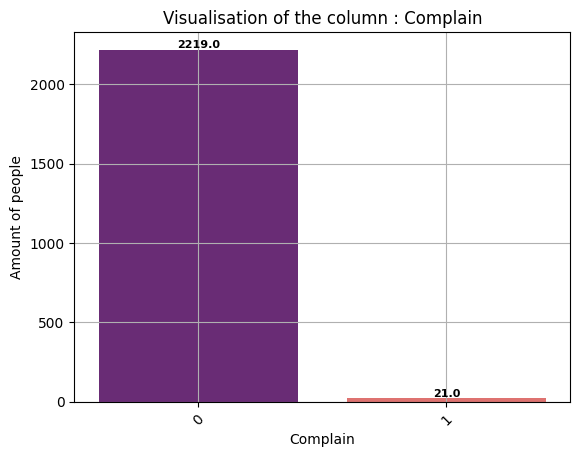

In [162]:
categorical_visualisation("Complain")

In [163]:
# We will calculate the amount of people unhappy in our analyse :

unhappy_user =  (df[df['Complain'] == 1].value_counts())
print(f"The percentage of people unhappy is : {round(((len(unhappy_user) / len(df))*100),2)} %")

The percentage of people unhappy is : 0.94 %


As we can see less than 1% of people are unhappy, it will be good to investigate why they are unhappy, and if we can find a reason why.

In [164]:
unhappy_user

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,
255,1951,Graduation,Divorced,22263.0,1,1,30-03-2014,31,17,0,2,0,0,2,2,1,0,3,6,0,0,0,0,0,1,3,11,0,1
7192,1955,Graduation,Together,65748.0,0,1,15-04-2013,58,172,73,93,95,78,34,2,2,4,10,1,0,0,0,0,0,1,3,11,0,1
10971,1977,Graduation,Single,37774.0,2,0,03-09-2012,28,173,8,107,7,2,176,4,7,2,3,9,1,0,0,0,0,1,3,11,1,1
10637,1964,Graduation,Married,40800.0,1,2,01-01-2013,77,24,0,27,8,30,10,2,3,0,3,7,0,0,0,0,0,1,3,11,0,1
10401,1976,2n Cycle,Together,26326.0,0,0,04-09-2013,12,1,0,5,0,3,9,1,0,0,3,3,0,0,0,0,0,1,3,11,0,1
9916,1954,Graduation,Married,38998.0,1,1,03-11-2012,92,34,1,14,0,0,5,3,2,0,3,8,0,0,0,0,0,1,3,11,0,1
9500,1959,Graduation,Married,58113.0,0,1,25-01-2013,66,221,104,169,102,78,84,3,9,2,8,7,0,0,0,0,0,1,3,11,0,1
9483,1959,Graduation,Together,57957.0,0,1,19-08-2013,24,290,59,177,77,5,29,7,4,6,8,3,0,0,0,0,0,1,3,11,0,1
7966,1959,Graduation,Single,80982.0,1,1,08-01-2013,48,505,137,401,104,22,22,3,11,5,11,5,0,0,0,0,0,1,3,11,0,1


# Feature Engineering

In this section, we will create some column to help us for our analyse.

## The user is parent?

In [165]:
# We are Creating a column 'IsParent' based on Kidhome and Teenhome :
df['IsParent'] = df.apply(lambda row: 1 if row['Kidhome'] > 0 or row['Teenhome'] > 0 else 0, axis=1)

In [166]:
isparent_user =  (df[df['IsParent'] == 1].value_counts())
print(f"The percentage of people who are parent is : {round(((len(isparent_user) / len(df))*100),2)} %")

The percentage of people who are parent is : 70.67 %


Visualisation of the Value for IsParent: 

IsParent
1    1602
0     638
Name: count, dtype: int64


Graphic of the visualisation for IsParent: 



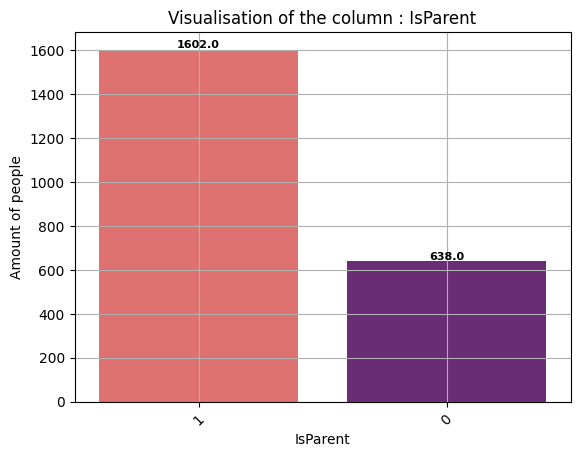

In [167]:
categorical_visualisation('IsParent')

## Age of the User

The dataset was made in 2021, so I will consider the date max is 2021.

In [168]:
df['Age_of_user'] = 2021 - df['Year_Birth']

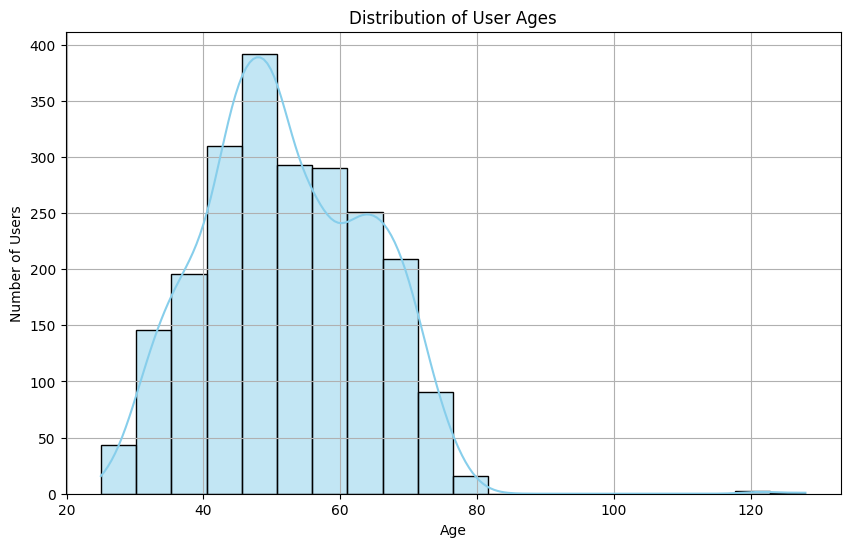

In [169]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age_of_user'], kde=True, bins=20, color='skyblue')  # Use histplot for age distribution (better for me)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

In [170]:
print(f"The average age of the user is : {round(df['Age_of_user'].mean(),2)} years")

The average age of the user is : 52.19 years


## Number of Kids

In [171]:
df['Number of Kids'] = df['Kidhome'] + df['Teenhome']

Visualisation of the Value for Number of Kids: 

Number of Kids
1    1128
0     638
2     421
3      53
Name: count, dtype: int64


Graphic of the visualisation for Number of Kids: 



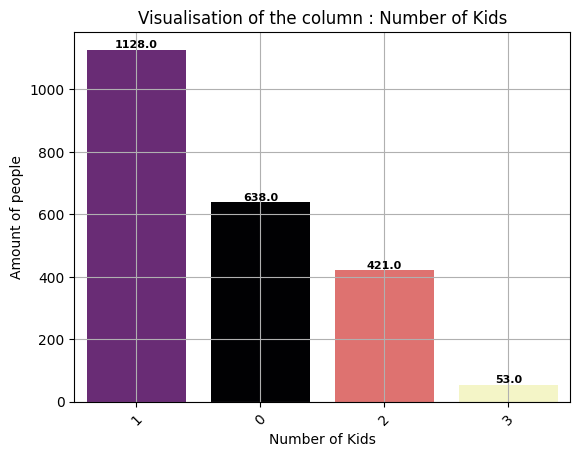

In [172]:
categorical_visualisation('Number of Kids')

As we can see, a lot of people don't have or have only 1 child.

## Create a column for the frequency first buy and last buy

The way to create with type of column will be usefull later if we want to make a RFM

## Removing some column with the same data